# Mushroom Classification
## Final Project by Ellie Stamper and Lily Alexander

#### initial data processing

In [29]:
#loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## I don't know how many of these we'll need but this is what I scraped from our assignments
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import set_config
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# import data

mushrooms_raw = pd.read_csv('secondary_data.csv',sep=';')
print(mushrooms_raw)

print(mushrooms_raw.isna().sum())

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

In [4]:

## Only cells without null values?

variables = ['class', 'cap-diameter', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring', 'habitat', 'season']
mushrooms_nona = mushrooms_raw[variables]
print(mushrooms_nona.isna().sum())

mushrooms_nona.to_csv('mushrooms.csv', index=False)
mushrooms_nona = pd.read_csv('mushrooms.csv')

class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64


In [5]:

## Replacing values 


col_dict = {'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'k':'black', 'o':'orange', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'f':'none'}

class_bool = mushrooms_nona['class'].replace({'p':0, 'e':1})
bruise_bleed_bool = mushrooms_nona['does-bruise-or-bleed'].replace({'f':0, 't':1})
ring_bool = mushrooms_nona['has-ring'].replace({'f':0, 't':1})
season_num = mushrooms_nona['season'].replace({'s':0, 'u':1, 'a':2, 'w':3})
habitat_full = mushrooms_nona['habitat'].replace({'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'h':'heaths', 'u':'urban', 'w':'waste', 'd':'woods'})
cap_s = mushrooms_nona['cap-shape'].replace({'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 's':'sunken', 'p':'spherical', 'o':'other'})
cap_c = mushrooms_nona['cap-color'].replace(col_dict)
gill_c = mushrooms_nona['gill-color'].replace(col_dict)
stem_c = mushrooms_nona['stem-color'].replace(col_dict)


new = {'class':class_bool, 'bruise_bleed':bruise_bleed_bool, 'has_ring':ring_bool, 'season':season_num, 'habitat':habitat_full,
       'cap_diameter':mushrooms_nona['cap-diameter'], 'cap_shape':cap_s, 'cap_color':cap_c, 'gill_color':gill_c,
       'stem_height':mushrooms_nona['stem-height'], 'stem_width':mushrooms_raw['stem-width'], 'stem_color':stem_c}
mushrooms = pd.DataFrame(data = new)
print(mushrooms.head())
print(mushrooms.columns)

   class  bruise_bleed  has_ring  season habitat  cap_diameter cap_shape  \
0      0             0         1       3   woods         15.26    convex   
1      0             0         1       1   woods         16.60    convex   
2      0             0         1       3   woods         14.07    convex   
3      0             0         1       3   woods         14.17      flat   
4      0             0         1       3   woods         14.64    convex   

  cap_color gill_color  stem_height  stem_width stem_color  
0    orange      white        16.95       17.09      white  
1    orange      white        17.99       18.19      white  
2    orange      white        17.80       17.74      white  
3       red      white        15.77       15.98      white  
4    orange      white        16.53       17.20      white  
Index(['class', 'bruise_bleed', 'has_ring', 'season', 'habitat',
       'cap_diameter', 'cap_shape', 'cap_color', 'gill_color', 'stem_height',
       'stem_width', 'stem_color']

In [6]:
#saving the cleaned data
mushrooms.to_csv('mushrooms_cleaned.csv', index=False)

In [7]:
#checking the data
mC = pd.read_csv('mushrooms_cleaned.csv')
print(mC.head())

#testing adjusted keys
print(mC['stem_color'].unique())

print(mC['class'].value_counts())

   class  bruise_bleed  has_ring  season habitat  cap_diameter cap_shape  \
0      0             0         1       3   woods         15.26    convex   
1      0             0         1       1   woods         16.60    convex   
2      0             0         1       3   woods         14.07    convex   
3      0             0         1       3   woods         14.17      flat   
4      0             0         1       3   woods         14.64    convex   

  cap_color gill_color  stem_height  stem_width stem_color  
0    orange      white        16.95       17.09      white  
1    orange      white        17.99       18.19      white  
2    orange      white        17.80       17.74      white  
3       red      white        15.77       15.98      white  
4    orange      white        16.53       17.20      white  
['white' 'yellow' 'brown' 'purple' 'buff' 'blue' 'green' 'pink' 'red'
 'black' 'gray' 'orange' 'none']
0    33888
1    27181
Name: class, dtype: int64


#### building features

0    33888
1    27181
Name: class, dtype: int64


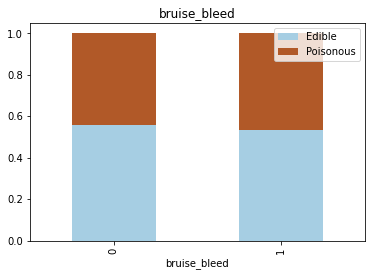

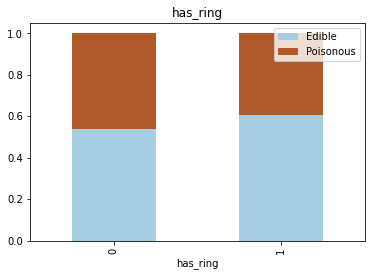

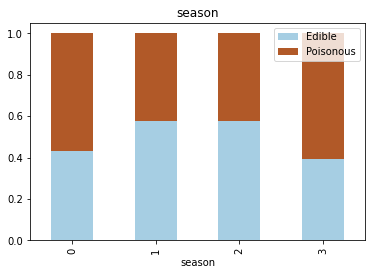

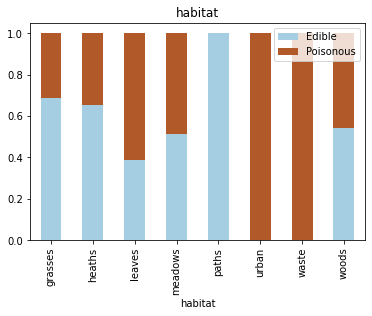

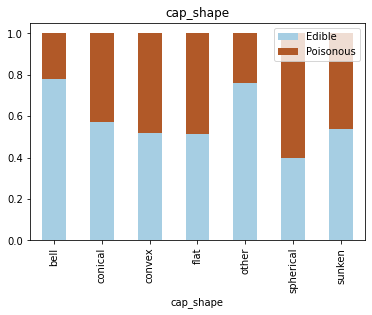

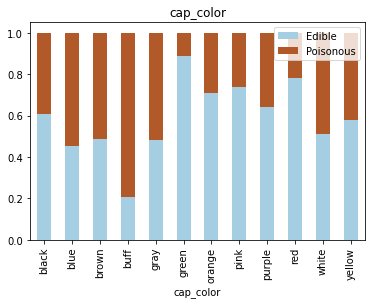

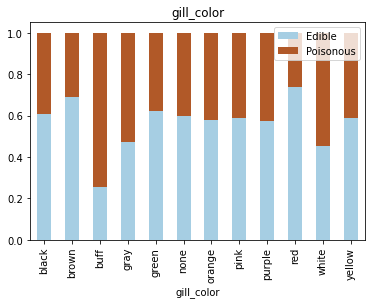

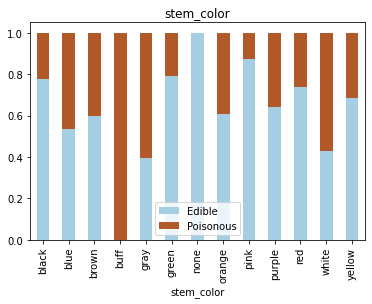

In [8]:
# is a variable useful???
variables_cat = ['bruise_bleed', 'has_ring', 'season', 'habitat', 'cap_shape', 'cap_color', 'gill_color', 'stem_color']
print(mushrooms['class'].value_counts())

for item in variables_cat:
    df = mushrooms[['class', item]]
    srt_item = df.groupby(item)['class'].value_counts(normalize = True).unstack()
    plot = srt_item.plot(kind = 'bar', stacked = True,cmap='Paired')
    plt.title(item)
    plt.legend(labels=['Edible','Poisonous'])
    plt.savefig(item+" Bar Chart.jpg")
    plt.show()

#### It was observed that specimens that were found in the 'path' 
#### habitat were always poisonous, and specimens found in the 
#### 'urban' or 'waste' habitats were always edible. 
#### Similarly, specimens with the stem color 'buff' were always 
#### found to be edible, whereas if the stem color fell into 
#### 'other' they were always poisonous. 

#### In the gill color variable, if the gills were identified to 
#### be red or brown in color, there were more likely to be 
#### poisonous, in contrast, if the gill color was identified as 
#### buff, then it was significantly more likely to be classed as 
#### edible. 

#### If the mushroom's cap color was identified as green, red, 
#### pink, orange, or purple, the mushroom has a much higher 
#### likelihood of being classified as poisonous. And similar 
#### to the gill color, if the color was identified as buff, 
#### then it was significantly more likely to be classed as edible. 

#### In cap shape, if the mushroom was identified with a bell cap
#### shape or put into the 'other' category, then it had a higher 
#### proportion of poisonous mushrooms. 

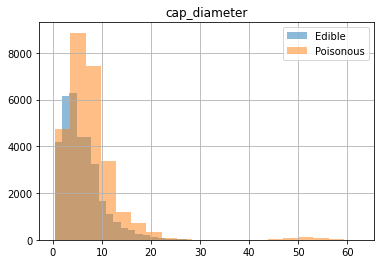

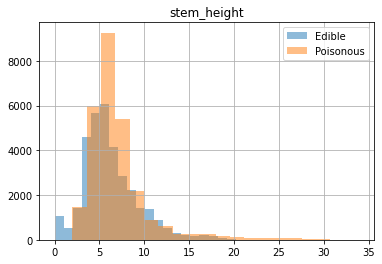

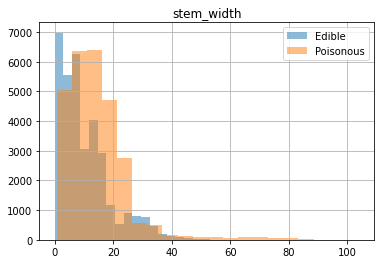

In [9]:
variables_num = mushrooms[['cap_diameter', 'stem_height', 'stem_width']]

for var in variables_num:
    data = mushrooms[['class', var]]
    data.groupby('class')[var].hist(bins=20,alpha=0.5, legend=True)
    plt.title(var)
    plt.legend(labels=['Edible','Poisonous'])
    plt.savefig(var+" Histogram.jpg")
    plt.show()

#### The most notable observation is that when any of the three
#### numerical variables are high, they are more likely to be 
#### edible than if they are small. 

### helper function

In [11]:
def metric_calc(y,y_pred,label):
    train_accuracy = metrics.accuracy_score(y,y_pred)
    train_precision = metrics.precision_score(y,y_pred)
    train_recall = metrics.recall_score(y,y_pred)
    train_f1 = metrics.f1_score(y,y_pred)

    print(f"---{label} Performance---")
    print(f"{label} Accuracy:", train_accuracy)
    print(f"{label} Precision:", train_precision)
    print(f"{label} Recall:", train_recall)
    print(f"{label} F1 Score:", train_f1)

### EDA visualizations

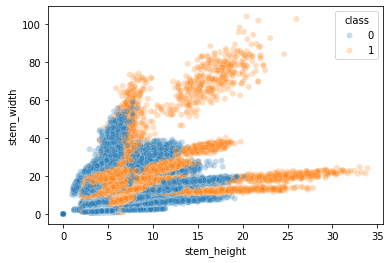

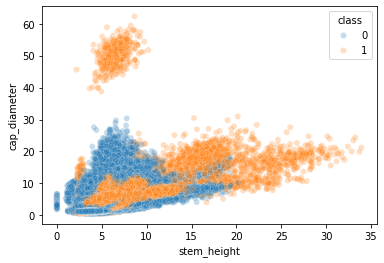

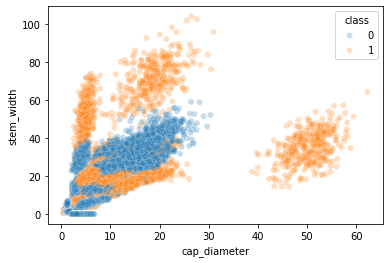

In [12]:
mushrooms = pd.read_csv('mushrooms_cleaned.csv')

sns.scatterplot(data=mushrooms,x='stem_height',y='stem_width',hue='class',alpha=0.25)
plt.savefig('sHeightvssWidth.jpg')
plt.show()
sns.scatterplot(data=mushrooms,x='stem_height',y='cap_diameter',hue='class',alpha=0.25)
plt.savefig('sHeightvscDiameter.jpg')
plt.show()
sns.scatterplot(data=mushrooms,x='cap_diameter',y='stem_width',hue='class',alpha=0.25)
plt.savefig('cDiametervssWidth.jpg')
plt.show()

## Model Training

In [13]:
#loading whole dataset
mushrooms = pd.read_csv('mushrooms_cleaned.csv')
mushrooms = mushrooms.drop(['bruise_bleed','has_ring'],axis=1)

print(mushrooms.head())

   class  season habitat  cap_diameter cap_shape cap_color gill_color  \
0      0       3   woods         15.26    convex    orange      white   
1      0       1   woods         16.60    convex    orange      white   
2      0       3   woods         14.07    convex    orange      white   
3      0       3   woods         14.17      flat       red      white   
4      0       3   woods         14.64    convex    orange      white   

   stem_height  stem_width stem_color  
0        16.95       17.09      white  
1        17.99       18.19      white  
2        17.80       17.74      white  
3        15.77       15.98      white  
4        16.53       17.20      white  


In [14]:
#Setting up Lists for later
print(mushrooms.describe())

quant_features = ['cap_diameter','stem_height','stem_width']
cat_features = ['season','habitat','cap_shape','cap_color','gill_color','stem_color']
all_features = quant_features+cat_features

              class        season  cap_diameter   stem_height    stem_width
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000
mean       0.445087      1.621985      6.733854      6.581538     12.149410
std        0.496979      0.704933      5.264845      3.370017     10.035955
min        0.000000      0.000000      0.380000      0.000000      0.000000
25%        0.000000      1.000000      3.480000      4.640000      5.210000
50%        0.000000      2.000000      5.860000      5.950000     10.190000
75%        1.000000      2.000000      8.540000      7.740000     16.570000
max        1.000000      3.000000     62.340000     33.920000    103.910000


In [15]:
#Setting up dummy variables
mushrooms = pd.get_dummies(mushrooms,columns=cat_features)
print(mushrooms.columns)

Index(['class', 'cap_diameter', 'stem_height', 'stem_width', 'season_0',
       'season_1', 'season_2', 'season_3', 'habitat_grasses', 'habitat_heaths',
       'habitat_leaves', 'habitat_meadows', 'habitat_paths', 'habitat_urban',
       'habitat_waste', 'habitat_woods', 'cap_shape_bell', 'cap_shape_conical',
       'cap_shape_convex', 'cap_shape_flat', 'cap_shape_other',
       'cap_shape_spherical', 'cap_shape_sunken', 'cap_color_black',
       'cap_color_blue', 'cap_color_brown', 'cap_color_buff', 'cap_color_gray',
       'cap_color_green', 'cap_color_orange', 'cap_color_pink',
       'cap_color_purple', 'cap_color_red', 'cap_color_white',
       'cap_color_yellow', 'gill_color_black', 'gill_color_brown',
       'gill_color_buff', 'gill_color_gray', 'gill_color_green',
       'gill_color_none', 'gill_color_orange', 'gill_color_pink',
       'gill_color_purple', 'gill_color_red', 'gill_color_white',
       'gill_color_yellow', 'stem_color_black', 'stem_color_blue',
       'stem_color

In [16]:
#splitting the data into train/test/validate 
np.random.seed(470) #470 is the number of medicinal mushroom species

X = mushrooms.drop(['class'],axis=1)
y = mushrooms['class']

X_train, X_raw, y_train, y_raw = train_test_split(X, y, test_size=0.3)
print("X_train",X_train.shape)

#To use in a later file
X_raw = pd.DataFrame(X_raw)
y_raw = pd.DataFrame(y_raw)

X_raw.to_csv('X_raw.csv',index=False)
y_raw.to_csv('y_raw.csv',index=False)

X_train (42748, 59)


### Decision Tree with Training Data

In [21]:
#Decision Tree
#Train the model
depth_lim = 10

model = DecisionTreeClassifier(criterion='entropy',max_depth=depth_lim)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)

# Evaluate the Model 
print("Decision Trees")
metric_calc(y_train,y_pred_train,"Training")

Decision Trees
---Training Performance---
Training Accuracy: 0.8155937119865256
Training Precision: 0.7549814483990656
Training Recall: 0.8667437946992007
Training F1 Score: 0.8070115308345778


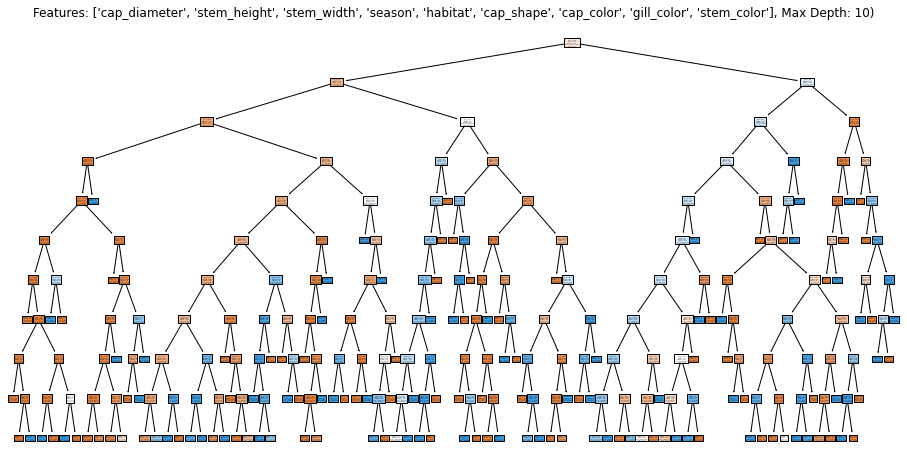

In [22]:
# Plot the DT
plt.figure(figsize=(16,8))

plot_tree(model,class_names=['edible','poisonous'], filled=True) #class names need to be in the correct order as their indexes/values "(0 and 1)", filled = colors

plt.title(f'Features: {(quant_features+cat_features)}, Max Depth: {depth_lim})')
plt.savefig('Decision Tree.jpg')
plt.show()

### K Nearest Neighbors with Training Data

In [23]:
best_recall = 0
best_k= 0
#Starting KNN Analysis
for k in range(1,11):
    knn_spec = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn_fit = knn_spec.fit(X_train, y_train)
    knn_prediction = knn_fit.predict(X_train)

    train_recall = metrics.recall_score(y_train,knn_prediction)
    print(f"K: {k}, Training Recall Score: {train_recall}")

    if train_recall>best_recall:
        best_recall=train_recall
        best_k=k

K: 1, Training Recall Score: 1.0
K: 2, Training Recall Score: 0.9834350021034918
K: 3, Training Recall Score: 0.9915334455195625
K: 4, Training Recall Score: 0.9841186369373159
K: 5, Training Recall Score: 0.9881152713504417
K: 6, Training Recall Score: 0.9830668910391249
K: 7, Training Recall Score: 0.9870635254522507
K: 8, Training Recall Score: 0.9824884307951199
K: 9, Training Recall Score: 0.9856962557846024
K: 10, Training Recall Score: 0.9807004627681952


In [24]:
#Training the Model
knn_spec = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn_spec.fit(X_train, y_train)
knn_prediction = knn_fit.predict(X_train)

#Evaluated the Model
print("K Nearest Neighbors")
metric_calc(y_train,knn_prediction,"Training")

K Nearest Neighbors
---Training Performance---
Training Accuracy: 0.9920230186207541
Training Precision: 0.9905437352245863
Training Recall: 0.9915334455195625
Training F1 Score: 0.9910383432761294


### Gaussian Naive Bayes with Training Data

In [25]:
#Training the Model
modelGB = GaussianNB()
modelGB.fit(X_train, y_train)

y_predGB = modelGB.predict(X_train)

#Evaluating the Model
print("Gaussian Naive Bayes")
metric_calc(y_train,y_predGB,"Training")

Gaussian Naive Bayes
---Training Performance---
Training Accuracy: 0.6699026855057546
Training Precision: 0.6781692698873956
Training Recall: 0.4909023979806479
Training F1 Score: 0.569537231933132


## Model Validation

In [26]:
#importing necessary variables/functions
X_raw = pd.read_csv("X_raw.csv")
y_raw = pd.read_csv("y_raw.csv")
y_raw = np.ravel(y_raw)
print(X_raw.shape,y_raw.shape)

(18321, 59) (18321,)


In [27]:
#splitting the data into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_raw, y_raw, test_size=0.33)
print(X_val.shape,X_test.shape)

(12275, 59) (6046, 59)


### Decision Tree with Validation Data

In [30]:
#Decision Tree Validation
depth_lim=10

model = DecisionTreeClassifier(criterion='entropy',max_depth=depth_lim)
model.fit(X_val,y_val)

y_pred_val = model.predict(X_val)


dt_prob = model.predict_proba(X_val)[:,1]
dt_fpr, dt_tpr, dt_thresholds = metrics.roc_curve(y_val, dt_prob)
dt_roc_auc = metrics.auc(dt_fpr, dt_tpr)
print(dt_roc_auc)

dt_CM = confusion_matrix(y_val,y_pred_val).ravel()
print(dt_CM)

0.8982176722430837
[5408 1382  861 4624]


In [31]:
# Evaluate the Model 
print("Decision Tree")
metric_calc(y_val,y_pred_val,"Validation")

Decision Tree
---Validation Performance---
Validation Accuracy: 0.8172708757637475
Validation Precision: 0.7698967698967699
Validation Recall: 0.8430264357338195
Validation F1 Score: 0.8048037594639282


### K Nearest Neighbors with Validation Data

In [32]:
#KNN Validation
best_k = 3  #use the one from the training set

model = KNeighborsClassifier(n_neighbors=best_k)
knn_fit = model.fit(X_val, y_val)
knn_prediction = knn_fit.predict(X_val)

knn_prob = model.predict_proba(X_val)[:,1]
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_val, knn_prob)
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)
print(knn_roc_auc)

knn_CM = confusion_matrix(y_val,knn_prediction).ravel()
print(knn_CM)

#Evaluate the Model
print("K Nearest Neighbors")
metric_calc(y_val,knn_prediction,"Validation")

0.9993070135044968
[6712   78   87 5398]
K Nearest Neighbors
---Validation Performance---
Validation Accuracy: 0.9865580448065173
Validation Precision: 0.9857560262965669
Validation Recall: 0.9841385597082953
Validation F1 Score: 0.984946628957212


### Gaussian Naive Bayes with Validation Data

In [33]:
#Naive Bayes Validation
modelGB = GaussianNB()
modelGB.fit(X_val, y_val)

y_predGB = modelGB.predict(X_val)

NB_prob = modelGB.predict_proba(X_val)[:,1]
NB_fpr, NB_tpr, NB_thresholds = metrics.roc_curve(y_val, NB_prob)
NB_roc_auc = metrics.auc(NB_fpr, NB_tpr)
print(NB_roc_auc)

gb_CM = confusion_matrix(y_val,y_predGB).ravel()
print(gb_CM)

# Evaluate the model
print("Gaussian Naive Bayes")
metric_calc(y_val,y_predGB,"Validation")

0.7369524462887805
[5648 1142 2972 2513]
Gaussian Naive Bayes
---Validation Performance---
Validation Accuracy: 0.6648472505091649
Validation Precision: 0.6875512995896033
Validation Recall: 0.45815861440291705
Validation F1 Score: 0.549890590809628


## Analysis of Models

### ROC Curve

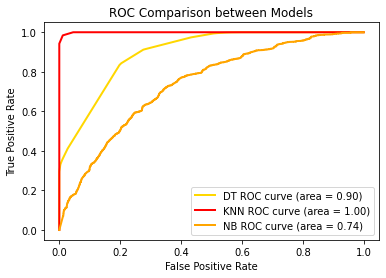

In [34]:
#Computing ROC Curves for Each Model
plt.figure()
plt.plot(dt_fpr, dt_tpr, color='gold', lw=2, label='DT ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot(NB_fpr, NB_tpr, color='orange', lw=2, label='NB ROC curve (area = %0.2f)' % NB_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison between Models')
plt.legend()
plt.savefig('ROC Curve.jpg')
plt.show()

#### Confusion Matrices

In [37]:
#Creating Confusion Matrices
print(dt_CM,knn_CM,gb_CM)

dt_CM = dt_CM.reshape(2,2)
knn_CM = knn_CM.reshape(2,2)
gb_CM = gb_CM.reshape(2,2)

[[5408 1382]
 [ 861 4624]] [[6712   78]
 [  87 5398]] [[5648 1142]
 [2972 2513]]


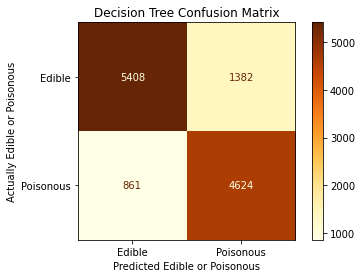

In [38]:
dt_CM_display = ConfusionMatrixDisplay(confusion_matrix=dt_CM,display_labels=['Edible','Poisonous'])
dt_CM_display.plot(cmap='YlOrBr')
plt.xlabel('Predicted Edible or Poisonous')
plt.ylabel('Actually Edible or Poisonous')
plt.title("Decision Tree Confusion Matrix")
plt.savefig("Decision Tree Confusion Matrix.jpg")
plt.show()

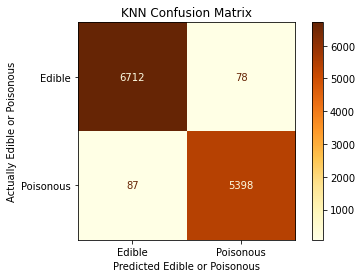

In [39]:
knn_CM_display = ConfusionMatrixDisplay(confusion_matrix=knn_CM,display_labels=['Edible','Poisonous'])
knn_CM_display.plot(cmap='YlOrBr')
plt.xlabel('Predicted Edible or Poisonous')
plt.ylabel('Actually Edible or Poisonous')
plt.title("KNN Confusion Matrix")
plt.savefig("KNN Confusion Matrix.jpg")
plt.show()

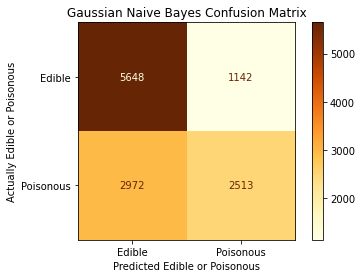

In [40]:
gb_CM_display = ConfusionMatrixDisplay(confusion_matrix=gb_CM,display_labels=['Edible','Poisonous'])
gb_CM_display.plot(cmap='YlOrBr')
plt.xlabel('Predicted Edible or Poisonous')
plt.ylabel('Actually Edible or Poisonous')
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.savefig("Gaussian Naive Bayes Confusion Matrix.jpg")
plt.show()

### The Best Model is the KNN Model

## KNN Performance on Test Data

In [41]:
#KNN on the Test Data
best_k = 3  

model = KNeighborsClassifier(n_neighbors=best_k)
knn_fit = model.fit(X_test, y_test)
knn_test_prediction = knn_fit.predict(X_test)

In [42]:
#Evaluate the Model
print("K Nearest Neighbors Test")
metric_calc(y_test,knn_test_prediction,"Test")

K Nearest Neighbors Test
---Test Performance---
Test Accuracy: 0.9852795236520013
Test Precision: 0.9824953445065177
Test Recall: 0.9843283582089553
Test F1 Score: 0.9834109972041006
